In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

import numpy as np
import seaborn as sns
import pandas as pd
import wandb

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [2]:
api = wandb.Api()
entity, project = "invariance-learners", "icml2024"  # set to your entity and project 

### Find duplicated runs

In [3]:
sweep_names = [
    "vae_sweep_000_25k_0",
    "vae_sweep_000_25k_1",
    "vae_sweep_000_25k_2",
    "vae_sweep_000_37k5_0",
    "vae_sweep_000_37k5_1",
    "vae_sweep_000_37k5_2",
    "vae_sweep_000_50k_0",
    "vae_sweep_000_50k_1",
    "vae_sweep_000_50k_2",
    "vae_sweep_015_25k_0",
    "vae_sweep_015_25k_1",
    "vae_sweep_015_25k_2",
    "vae_sweep_015_37k5_0",
    "vae_sweep_015_37k5_1",
    "vae_sweep_015_37k5_2",
    "vae_sweep_015_50k_0",
    "vae_sweep_015_50k_1",
    "vae_sweep_015_50k_2",
    "vae_sweep_090_25k_0",
    "vae_sweep_090_25k_1",
    "vae_sweep_090_25k_2",
    "vae_sweep_090_37k5_0",
    "vae_sweep_090_37k5_1",
    "vae_sweep_090_37k5_2",
    "vae_sweep_090_50k_0",
    "vae_sweep_090_50k_1",
    "vae_sweep_090_50k_2",
    "vae_sweep_180_25k_0",
    "vae_sweep_180_25k_1",
    "vae_sweep_180_25k_2",
    "vae_sweep_180_37k5_0",
    "vae_sweep_180_37k5_1",
    "vae_sweep_180_37k5_2",
    "vae_sweep_180_50k_0",
    "vae_sweep_180_50k_1",
    "vae_sweep_180_50k_2",
    "augvae_sweep_000_25k_0",
    "augvae_sweep_000_25k_1",
    "augvae_sweep_000_25k_2",
    "augvae_sweep_000_37k5_0",
    "augvae_sweep_000_37k5_1",
    "augvae_sweep_000_37k5_2",
    "augvae_sweep_000_50k_0",
    "augvae_sweep_000_50k_1",
    "augvae_sweep_000_50k_2",
    "augvae_sweep_015_25k_0",
    "augvae_sweep_015_25k_1",
    "augvae_sweep_015_25k_2",
    "augvae_sweep_015_37k5_0",
    "augvae_sweep_015_37k5_1",
    "augvae_sweep_015_37k5_2",
    "augvae_sweep_015_50k_0",
    "augvae_sweep_015_50k_1",
    "augvae_sweep_015_50k_2",
    "augvae_sweep_090_25k_0",
    "augvae_sweep_090_25k_1",
    "augvae_sweep_090_25k_2",
    "augvae_sweep_090_37k5_0",
    "augvae_sweep_090_37k5_1",
    "augvae_sweep_090_37k5_2",
    "augvae_sweep_090_50k_0",
    "augvae_sweep_090_50k_1",
    "augvae_sweep_090_50k_2",
    "augvae_sweep_180_25k_0",
    "augvae_sweep_180_25k_1",
    "augvae_sweep_180_25k_2",
    "augvae_sweep_180_37k5_0",
    "augvae_sweep_180_37k5_1",
    "augvae_sweep_180_37k5_2",
    "augvae_sweep_180_50k_0",
    "augvae_sweep_180_50k_1",
    "augvae_sweep_180_50k_2",
    "invvae_sweep_000_25k_0",
    "invvae_sweep_000_25k_1",
    "invvae_sweep_000_25k_2",
    "invvae_sweep_000_37k5_0",
    "invvae_sweep_000_37k5_1",
    "invvae_sweep_000_37k5_2",
    "invvae_sweep_000_50k_0",
    "invvae_sweep_000_50k_1",
    "invvae_sweep_000_50k_2",
    "invvae_sweep_015_25k_0",
    "invvae_sweep_015_25k_1",
    "invvae_sweep_015_25k_2",
    "invvae_sweep_015_37k5_0",
    "invvae_sweep_015_37k5_1",
    "invvae_sweep_015_37k5_2",
    "invvae_sweep_015_50k_0",
    "invvae_sweep_015_50k_1",
    "invvae_sweep_015_50k_2",
    "invvae_sweep_090_25k_0",
    "invvae_sweep_090_25k_1",
    "invvae_sweep_090_25k_2",
    "invvae_sweep_090_37k5_0",
    "invvae_sweep_090_37k5_1",
    "invvae_sweep_090_37k5_2",
    "invvae_sweep_090_50k_0",
    "invvae_sweep_090_50k_1",
    "invvae_sweep_090_50k_2",
    "invvae_sweep_180_25k_0",
    "invvae_sweep_180_25k_1",
    "invvae_sweep_180_25k_2",
    "invvae_sweep_180_37k5_0",
    "invvae_sweep_180_37k5_1",
    "invvae_sweep_180_37k5_2",
    "invvae_sweep_180_50k_0",
    "invvae_sweep_180_50k_1",
    "invvae_sweep_180_50k_2",
]

In [4]:
# create dict mapping sweep name to sweep id
sweep_id_dict = {}
for sweep in api.project(project).sweeps():
    if sweep.name in sweep_names:
        if sweep.name in sweep_id_dict:
            sweep_id = sweep_id_dict[sweep.name]
            if isinstance(sweep_id, list):
                sweep_id_dict[sweep.name].append(sweep.id)
            else:
                sweep_id_dict[sweep.name] = [sweep_id, sweep.id]
        else:
            sweep_id_dict[sweep.name] = sweep.id

{name: ids for name, ids in sweep_id_dict.items() if isinstance(ids, list)}

{'invvae_sweep_180_25k_0': ['vvefau8v', 'xi5aoj10'],
 'invvae_sweep_180_37k5_0': ['0omzniei', 'b2vsbjo3'],
 'invvae_sweep_180_50k_0': ['h5tywea9', 'n3h6gdwd'],
 'invvae_sweep_090_25k_0': ['cu31azxh', 'pg1g78kl'],
 'invvae_sweep_090_50k_0': ['5xxw7qnp', 'yz6eq3n5'],
 'invvae_sweep_090_37k5_0': ['qtm32k86', 'runnu1l6'],
 'invvae_sweep_015_25k_0': ['7rsugqlf', 'x0u5fasy'],
 'invvae_sweep_015_37k5_0': ['vbwr4l3r', '2ofkn2pd'],
 'invvae_sweep_015_50k_0': ['ffftoapj', 'vxbnl83p'],
 'invvae_sweep_000_25k_0': ['qs48qmd1', '5p99tunr', 'zon0va0n'],
 'invvae_sweep_000_37k5_0': ['d1hqewgp', 'oqf7rhmb', 'g9oaipeb'],
 'invvae_sweep_000_50k_0': ['pymico1b', '8yfktqeo', '3qr7o0l2'],
 'vae_sweep_180_25k_0': ['nlh5fv06', 'vse9smaw'],
 'vae_sweep_180_50k_0': ['lutna5ui', '1tjwit5m'],
 'vae_sweep_000_25k_0': ['qmaclyvd', 'mw5je5vn'],
 'vae_sweep_000_50k_0': ['ob9dj76y', 'elzqyq9c', 'lb99ocz5'],
 'augvae_sweep_180_25k_0': ['o5jef5mf', '018z820f'],
 'augvae_sweep_180_50k_0': ['5bwwl087', '3sv1g1kc'],
 'augv

manually select the duplicated run IDs:

In [5]:
sweep_id_dict['vae_sweep_180_25k_0'] = 'nlh5fv06'
sweep_id_dict['vae_sweep_180_50k_0'] = 'lutna5ui'
sweep_id_dict['vae_sweep_000_25k_0'] = 'qmaclyvd'
sweep_id_dict['vae_sweep_000_50k_0'] = 'ob9dj76y'
sweep_id_dict['augvae_sweep_180_25k_0'] = 'o5jef5mf'
sweep_id_dict['augvae_sweep_180_50k_0'] = '5bwwl087'
sweep_id_dict['augvae_sweep_000_25k_0'] = 'qp2z5kj6'
sweep_id_dict['augvae_sweep_000_50k_0'] = '84ionfmm'
sweep_id_dict['invvae_sweep_180_25k_0'] = 'vvefau8v'
sweep_id_dict['invvae_sweep_180_37k5_0'] = '0omzniei'
sweep_id_dict['invvae_sweep_180_50k_0'] = 'h5tywea9'
sweep_id_dict['invvae_sweep_090_25k_0'] = 'cu31azxh'
sweep_id_dict['invvae_sweep_090_50k_0'] = '5xxw7qnp'
sweep_id_dict['invvae_sweep_090_37k5_0'] = 'qtm32k86'
sweep_id_dict['invvae_sweep_015_25k_0'] = '7rsugqlf'
sweep_id_dict['invvae_sweep_015_37k5_0'] = 'vbwr4l3r'
sweep_id_dict['invvae_sweep_015_50k_0'] = 'ffftoapj'
sweep_id_dict['invvae_sweep_000_25k_0'] = 'qs48qmd1'
sweep_id_dict['invvae_sweep_000_37k5_0'] = 'd1hqewgp'
sweep_id_dict['invvae_sweep_000_50k_0'] = 'pymico1b'

{name: ids for name, ids in sweep_id_dict.items() if isinstance(ids, list)}

{}

### Get run data

In [6]:
summary_list, config_list, name_list, tags, ids, states, sweeps, sweep_ids = [], [], [], [], [], [],  [], []

for sweep, sweep_id in sweep_id_dict.items():
    runs = api.sweep(entity + "/" + project + "/" + sweep_id).runs

    for run in runs: 
        # .summary contains the output keys/values for metrics like accuracy.
        #  We call ._json_dict to omit large files 
        summary_list.append(run.summary._json_dict)

        # .config contains the hyperparameters.
        #  We remove special values that start with _.
        config_list.append(
            {k: v for k,v in run.config.items()
            if not k.startswith('_')})

        # .name is the human-readable name of the run.
        name_list.append(run.name)

        tags.append(run.tags)

        ids.append(run.id)

        states.append(run.state)

        sweeps.append(sweep)

        sweep_ids.append(sweep_id)

runs_df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list,
    "tags": tags,
    "id": ids,
    "state": states,
    "sweep": sweeps,
    "sweep_id": sweep_ids,
    })

runs_df

,summary,config,name,tags,id,state,sweep,sweep_id
0,"{'_runtime': 698.8858563899994, '_timestamp': ...","{'lr': 0.009, 'seed': 0, 'angle': 180, 'model'...",deep-sweep-72,[],6g45bojc,finished,invvae_sweep_180_25k_0,vvefau8v
1,{'gen_plots_0': {'path': 'media/images/gen_plo...,"{'lr': 0.009, 'seed': 0, 'angle': 180, 'model'...",restful-sweep-68,[],jld6hyq3,finished,invvae_sweep_180_25k_0,vvefau8v
2,"{'valid/ll': 1523.837890625, 'train/iwlb': Non...","{'lr': 0.009, 'seed': 0, 'angle': 180, 'model'...",super-sweep-69,[],q62ohbxs,finished,invvae_sweep_180_25k_0,vvefau8v
3,"{'recon': {'_type': 'image-file', 'width': 400...","{'lr': 0.009, 'seed': 0, 'angle': 180, 'model'...",radiant-sweep-70,[],qp2n2e8j,finished,invvae_sweep_180_25k_0,vvefau8v
4,{'recon': {'path': 'media/images/recon_4999_d4...,"{'lr': 0.009, 'seed': 0, 'angle': 180, 'model'...",amber-sweep-67,[],v3v1wnj5,finished,invvae_sweep_180_25k_0,vvefau8v
...,...,...,...,...,...,...,...,...
6907,"{'_wandb': {'runtime': 650}, 'sample': {'sha25...","{'lr': 0.003, 'seed': 0, 'angle': 0, 'model': ...",northern-sweep-5,[],t1jaff13,finished,augvae_sweep_000_50k_0,84ionfmm
6908,"{'β': 1, 'test/loss': -717.705322265625, '_tim...","{'lr': 0.003, 'seed': 0, 'angle': 0, 'model': ...",distinctive-sweep-7,[],tzf4jlue,finished,augvae_sweep_000_50k_0,84ionfmm
6909,"{'_runtime': 267.1979019641876, 'test/elbo': 6...","{'lr': 0.003, 'seed': 0, 'angle': 0, 'model': ...",colorful-sweep-2,[],0i62fn5o,finished,augvae_sweep_000_50k_0,84ionfmm
6910,{'inf_plots_1': {'path': 'media/images/inf_plo...,"{'lr': 0.003, 'seed': 0, 'angle': 0, 'model': ...",worldly-sweep-1,[],ss2rf4o5,finished,augvae_sweep_000_50k_0,84ionfmm


In [7]:
df_expanded = runs_df.join(pd.json_normalize(runs_df['summary'], record_prefix='summary.').add_prefix('summary.')).drop('summary', axis='columns')
df_expanded = df_expanded.join(pd.json_normalize(runs_df['config'], record_prefix='config').add_prefix('config.')).drop('config', axis='columns')

df_expanded.columns

Index(['name', 'tags', 'id', 'state', 'sweep', 'sweep_id', 'summary._runtime',
       'summary._timestamp', 'summary.train/ll', 'summary.test/loss',
       ...
       'config.batch_size_eval', 'config.iwlb_num_samples',
       'config.warmup_steps_pct', 'config.shuffle_buffer_size',
       'config.repeat_after_batching', 'config.β_schedule_init_value',
       'config.β_schedule_final_value', 'config.model.conv_dims',
       'config.model.dense_dims', 'config.model.latent_dim'],
      dtype='object', length=104)

In [8]:
# take only completed runs 
df_filtered = df_expanded[df_expanded['state'] == 'finished']

# take only runs where config.model.dense_dims = 256
df_filtered = df_filtered[df_filtered['config.model.dense_dims'] == '256']

# take only runs with certain tags
# tags_to_keep = ['angle_sweep', 'num_trn_sweep', 'mnist', 'vae']
# df_filtered = df_filtered[df_filtered['tags'].apply(lambda x: all(tag in x for tag in tags_to_keep))]

# take only runs without certain tags
# tags_to_remove = ['test', 'hidden', 'ssilvae']
# df_filtered = df_filtered[~df_filtered['tags'].apply(lambda x: any(tag in x for tag in tags_to_remove))]

# replace nans in config.num_trn and config.angle with -1
df_filtered['config.num_trn'] = df_filtered['config.num_trn'].fillna(-1)
df_filtered['config.angle'] = df_filtered['config.angle'].fillna(0)

df_filtered

,name,tags,id,state,sweep,sweep_id,summary._runtime,summary._timestamp,summary.train/ll,summary.test/loss,summary.test/iwlb,summary.train/kld,summary.train/x_mse,summary.test/elbo,summary.test/x_mse,summary.train/elbo,summary.valid/loss,summary.valid/x_mse,summary.lr,summary.valid/ll,summary.train/iwlb,summary.train/loss,summary.valid/iwlb,summary.β,summary._step,summary.valid/kld,summary.test/ll,summary.test/kld,summary.valid/elbo,summary.gen_plots_1.sha256,summary.gen_plots_1.path,summary.gen_plots_1.size,summary.gen_plots_1._type,summary.gen_plots_1.width,summary.gen_plots_1.format,summary.gen_plots_1.height,summary.recon.path,summary.recon.size,summary.recon._type,summary.recon.width,summary.recon.format,summary.recon.height,summary.recon.sha256,summary._wandb.runtime,summary.gen_plots_0.width,summary.gen_plots_0.format,summary.gen_plots_0.height,summary.gen_plots_0.sha256,summary.gen_plots_0.path,summary.gen_plots_0.size,summary.gen_plots_0._type,summary.inf_plots_1.format,summary.inf_plots_1.height,summary.inf_plots_1.sha256,summary.inf_plots_1.path,summary.inf_plots_1.size,summary.inf_plots_1._type,summary.inf_plots_1.width,summary.sample.height,summary.sample.sha256,summary.sample.path,summary.sample.size,summary.sample._type,summary.sample.width,summary.sample.format,summary.inf_plots_0.format,summary.inf_plots_0.height,summary.inf_plots_0.sha256,summary.inf_plots_0.path,summary.inf_plots_0.size,summary.inf_plots_0._type,summary.inf_plots_0.width,config.lr,config.seed,config.angle,config.steps,config.dataset,config.num_trn,config.num_val,config.pp_eval,config.shuffle,config.pp_train,config.run_iwlb,config.clip_norm,config.eval_freq,config.plot_freq,config.val_split,config.batch_size,config.model_name,config.test_split,config.train_split,config.init_lr_mult,config.weight_decay,config.final_lr_mult,config.batch_size_eval,config.iwlb_num_samples,config.warmup_steps_pct,config.shuffle_buffer_size,config.repeat_after_batching,config.β_schedule_init_value,config.β_schedule_final_value,config.model.conv_dims,config.model.dense_dims,config.model.latent_dim
0,deep-sweep-72,[],6g45bojc,finished,invvae_sweep_180_25k_0,vvefau8v,698.885856,1.703373e+09,2099.368896,-1471.194824,1536.350830,48.073364,0.014156,1471.194824,0.018972,2051.294434,-1428.323730,0.019491,8.999999e-07,1476.300415,None,-2051.294434,None,1,20000,47.976192,1518.909424,47.713902,1428.323730,75ae32568b25cca4ced3f5698ff7807a1effbd188793a0...,media/images/gen_plots_1_summary_75ae32568b25c...,56297.0,image-file,2100.0,png,300.0,media/images/recon_19999_4050eff8a9fa105c85ce.png,54708,image-file,4000,png,400,4050eff8a9fa105c85ce89ec0a5b66636d85b7bb37e4ca...,742.0,2100.0,png,300.0,f78cc2a5aeb5062689823fea73a21d8565c384021a574e...,media/images/gen_plots_0_summary_f78cc2a5aeb50...,56753.0,image-file,png,300.0,9229cc9e0ea060c7d20ed4839a6709ffa17ec72b69a80e...,media/images/inf_plots_1_summary_9229cc9e0ea06...,65340.0,image-file,1500.0,200,de863037acbbc7d229200f9ac09dd5cec59afeb60234f8...,media/images/sample_19999_de863037acbbc7d22920...,34603,image-file,4000,png,png,300.0,7643e7b090dcf8f829c53fa262169b23d69eaf5e3850e8...,media/images/inf_plots_0_summary_7643e7b090dcf...,77956.0,image-file,1500.0,0.009,0,180,20000,MNIST,25000,10000,"value_range(-1, 1)|random_rotate(-180, 180, fi...",preprocessed,"value_range(-1, 1)|random_rotate(-180, 180, fi...",False,2,0.01,0.25,train[:10000],512,InvVAE,test,train[10000:35000],0.03,0.0001,0.0001,50,300,0.20,50000,True,1,1,"64,128,256",256,20
1,restful-sweep-68,[],jld6hyq3,finished,invvae_sweep_180_25k_0,vvefau8v,315.184361,1.703372e+09,1864.629761,-1639.774536,1672.571899,40.097389,0.014183,1639.774536,0.018422,1824.532715,-1626.962524,0.018863,8.999999e-07,1667.025024,None,-1824.532715,None,1,5000,40.061825,1679.682129,39.907642,1626.962524,75ae32568b25cca4ced3f5698ff7807a1effbd188793a0...,media/images/gen_plots_1_summary_75ae32568b25c...,56297.0,image-file,2100.0,png,300.0,media/images/recon_4999_8c262c40520ba06fad28.png,54951,image-fil

In [9]:
df_filtered['config.angle'].unique()

array([180,  90,  15,   0])

In [10]:
df_filtered['config.num_trn'].unique()

array([25000, 37500, 50000])

In [11]:
df_filtered['config.dataset'].unique()

array(['MNIST'], dtype=object)

In [12]:
df_filtered['config.model_name'].unique()

array(['InvVAE', 'VAE', 'AugVAE'], dtype=object)

In [13]:
df_filtered[df_filtered['config.dataset'] != 'MNIST']

,name,tags,id,state,sweep,sweep_id,summary._runtime,summary._timestamp,summary.train/ll,summary.test/loss,summary.test/iwlb,summary.train/kld,summary.train/x_mse,summary.test/elbo,summary.test/x_mse,summary.train/elbo,summary.valid/loss,summary.valid/x_mse,summary.lr,summary.valid/ll,summary.train/iwlb,summary.train/loss,summary.valid/iwlb,summary.β,summary._step,summary.valid/kld,summary.test/ll,summary.test/kld,summary.valid/elbo,summary.gen_plots_1.sha256,summary.gen_plots_1.path,summary.gen_plots_1.size,summary.gen_plots_1._type,summary.gen_plots_1.width,summary.gen_plots_1.format,summary.gen_plots_1.height,summary.recon.path,summary.recon.size,summary.recon._type,summary.recon.width,summary.recon.format,summary.recon.height,summary.recon.sha256,summary._wandb.runtime,summary.gen_plots_0.width,summary.gen_plots_0.format,summary.gen_plots_0.height,summary.gen_plots_0.sha256,summary.gen_plots_0.path,summary.gen_plots_0.size,summary.gen_plots_0._type,summary.inf_plots_1.format,summary.inf_plots_1.height,summary.inf_plots_1.sha256,summary.inf_plots_1.path,summary.inf_plots_1.size,summary.inf_plots_1._type,summary.inf_plots_1.width,summary.sample.height,summary.sample.sha256,summary.sample.path,summary.sample.size,summary.sample._type,summary.sample.width,summary.sample.format,summary.inf_plots_0.format,summary.inf_plots_0.height,summary.inf_plots_0.sha256,summary.inf_plots_0.path,summary.inf_plots_0.size,summary.inf_plots_0._type,summary.inf_plots_0.width,config.lr,config.seed,config.angle,config.steps,config.dataset,config.num_trn,config.num_val,config.pp_eval,config.shuffle,config.pp_train,config.run_iwlb,config.clip_norm,config.eval_freq,config.plot_freq,config.val_split,config.batch_size,config.model_name,config.test_split,config.train_split,config.init_lr_mult,config.weight_decay,config.final_lr_mult,config.batch_size_eval,config.iwlb_num_samples,config.warmup_steps_pct,config.shuffle_buffer_size,config.repeat_after_batching,config.β_schedule_init_value,config.β_schedule_final_value,config.model.conv_dims,config.model.dense_dims,config.model.latent_dim


In [14]:
df_filtered.groupby(
        ['config.angle', 'config.num_trn', 'config.model_name', 'config.seed', 'config.model.latent_dim', 'sweep', 'sweep_id']).count(
        ).query("`name` != 36")

,,,,,,,name,tags,id,state,summary._runtime,summary._timestamp,summary.train/ll,summary.test/loss,summary.test/iwlb,summary.train/kld,summary.train/x_mse,summary.test/elbo,summary.test/x_mse,summary.train/elbo,summary.valid/loss,summary.valid/x_mse,summary.lr,summary.valid/ll,summary.train/iwlb,summary.train/loss,summary.valid/iwlb,summary.β,summary._step,summary.valid/kld,summary.test/ll,summary.test/kld,summary.valid/elbo,summary.gen_plots_1.sha256,summary.gen_plots_1.path,summary.gen_plots_1.size,summary.gen_plots_1._type,summary.gen_plots_1.width,summary.gen_plots_1.format,summary.gen_plots_1.height,summary.recon.path,summary.recon.size,summary.recon._type,summary.recon.width,summary.recon.format,summary.recon.height,summary.recon.sha256,summary._wandb.runtime,summary.gen_plots_0.width,summary.gen_plots_0.format,summary.gen_plots_0.height,summary.gen_plots_0.sha256,summary.gen_plots_0.path,summary.gen_plots_0.size,summary.gen_plots_0._type,summary.inf_plots_1.format,summary.inf_plots_1.height,summary.inf_plots_1.sha256,summary.inf_plots_1.path,summary.inf_plots_1.size,summary.inf_plots_1._type,summary.inf_plots_1.width,summary.sample.height,summary.sample.sha256,summary.sample.path,summary.sample.size,summary.sample._type,summary.sample.width,summary.sample.format,summary.inf_plots_0.format,summary.inf_plots_0.height,summary.inf_plots_0.sha256,summary.inf_plots_0.path,summary.inf_plots_0.size,summary.inf_plots_0._type,summary.inf_plots_0.width,config.lr,config.steps,config.dataset,config.num_val,config.pp_eval,config.shuffle,config.pp_train,config.run_iwlb,config.clip_norm,config.eval_freq,config.plot_freq,config.val_split,config.batch_size,config.test_split,config.train_split,config.init_lr_mult,config.weight_decay,config.final_lr_mult,config.batch_size_eval,config.iwlb_num_samples,config.warmup_steps_pct,config.shuffle_buffer_size,config.repeat_after_batching,config.β_schedule_init_value,config.β_schedule_final_value,config.model.conv_dims,config.model.dense_dims
config.angle,config.num_trn,config.model_name,config.seed,config.model.latent_dim,sweep,sweep_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [15]:
df = df_filtered.sort_values(
    by='summary.valid/elbo', ascending=False).groupby(
        ['config.angle', 'config.num_trn', 'config.model_name', 'config.seed', 'config.model.latent_dim',])[
    ['summary.test/elbo', 'summary.test/ll', 'summary.test/x_mse', 'summary.test/iwlb']].first()
df

summary.test/elbo  \
config.angle config.num_trn config.model_name config.seed config.model.latent_dim                      
0            25000          AugVAE            0           16                             1064.313721   
                                                          20                             1110.110352   
                                              1           16                             1062.654297   
                                                          20                             1121.198120   
                                              2           16                             1058.048462   
...                                                                                              ...   
180          50000          VAE               0           20                             1035.402466   
                                              1           16                              995.324036   
                                                          20                             1036.078613   
                                              2           16                              990.129150   
                                                          20                             1043.622803   

                                                                                   summary.test/ll  \
config.angle config.num_trn config.model_name config.seed config.model.latent_dim                    
0            25000          AugVAE            0           16                           1114.804688   
                                                          20                           1169.912109   
                                              1           16                           1113.566040   
                                                          20                           1181.614990   
                                              2           16                           1108.324219   
...                                                                                            ...   
180          50000          VAE               0           20                           1100.125732   
                                              1           16                           1049.739624   
                                                          20                           1100.606689   
                                              2           16                           1044.540527   
                                                          20                           1108.865112   

                                                                                   summary.test/x_mse  \
config.angle config.num_trn config.model_name config.seed config.model.latent_dim                       
0            25000          AugVAE            0           16                                 0.030753   
                                                          20                                 0.023519   
                                              1           16                                 0.030916   
                                                          20                                 0.023467   
                                              2           16                                 0.030625   
...                                                                                               ...   
180          50000          VAE               0           20                                 0.028501   
                                              1           16                                 0.042008   
                                                          20                                 0.022162   
                                              2           16                                 0.043612   
                                                          20                                 0.020963   

                                     

<Axes: xlabel='config.angle', ylabel='summary.test/elbo'>

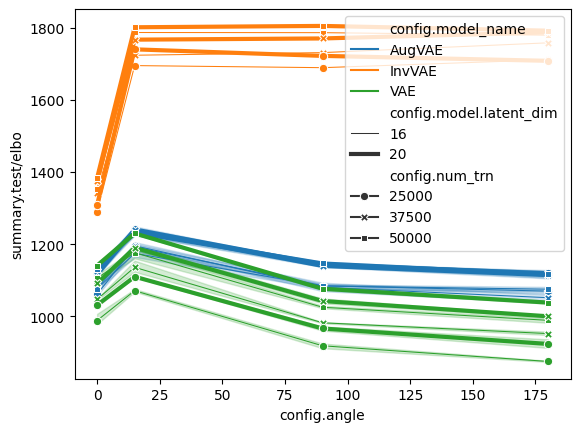

In [16]:
sns.lineplot(
    data=df.reset_index(),
    x="config.angle", 
    y="summary.test/elbo",
    hue='config.model_name',
    style='config.num_trn',
    size='config.model.latent_dim',
    markers=True,
    dashes=False)

In [17]:
# pivot the data frame so that each of the metrics is a column, and the values are the corresponding values
plot_df = df.reset_index().melt(
    id_vars=['config.angle', 'config.num_trn', 'config.model_name', 'config.seed', 'config.model.latent_dim'],
    # value_vars=['summary.test/elbo', 'summary.test/ll', 'summary.test/x_mse', 'summary.test/iwlb'],
    var_name='metric',
    value_name='value'
)
plot_df

,config.angle,config.num_trn,config.model_name,config.seed,config.model.latent_dim,metric,value
0,0,25000,AugVAE,0,16,summary.test/elbo,1064.313721
1,0,25000,AugVAE,0,20,summary.test/elbo,1110.110352
2,0,25000,AugVAE,1,16,summary.test/elbo,1062.654297
3,0,25000,AugVAE,1,20,summary.test/elbo,1121.198120
4,0,25000,AugVAE,2,16,summary.test/elbo,1058.048462
...,...,...,...,...,...,...,...
667,180,50000,VAE,0,20,summary.test/iwlb,1080.693604
668,180,50000,VAE,1,16,summary.test/iwlb,1036.643799
669,180,50000,VAE,1,20,summary.test/iwlb,1082.269897
670,180,50000,VAE,2,16,summary.test/iwlb,1032.450317


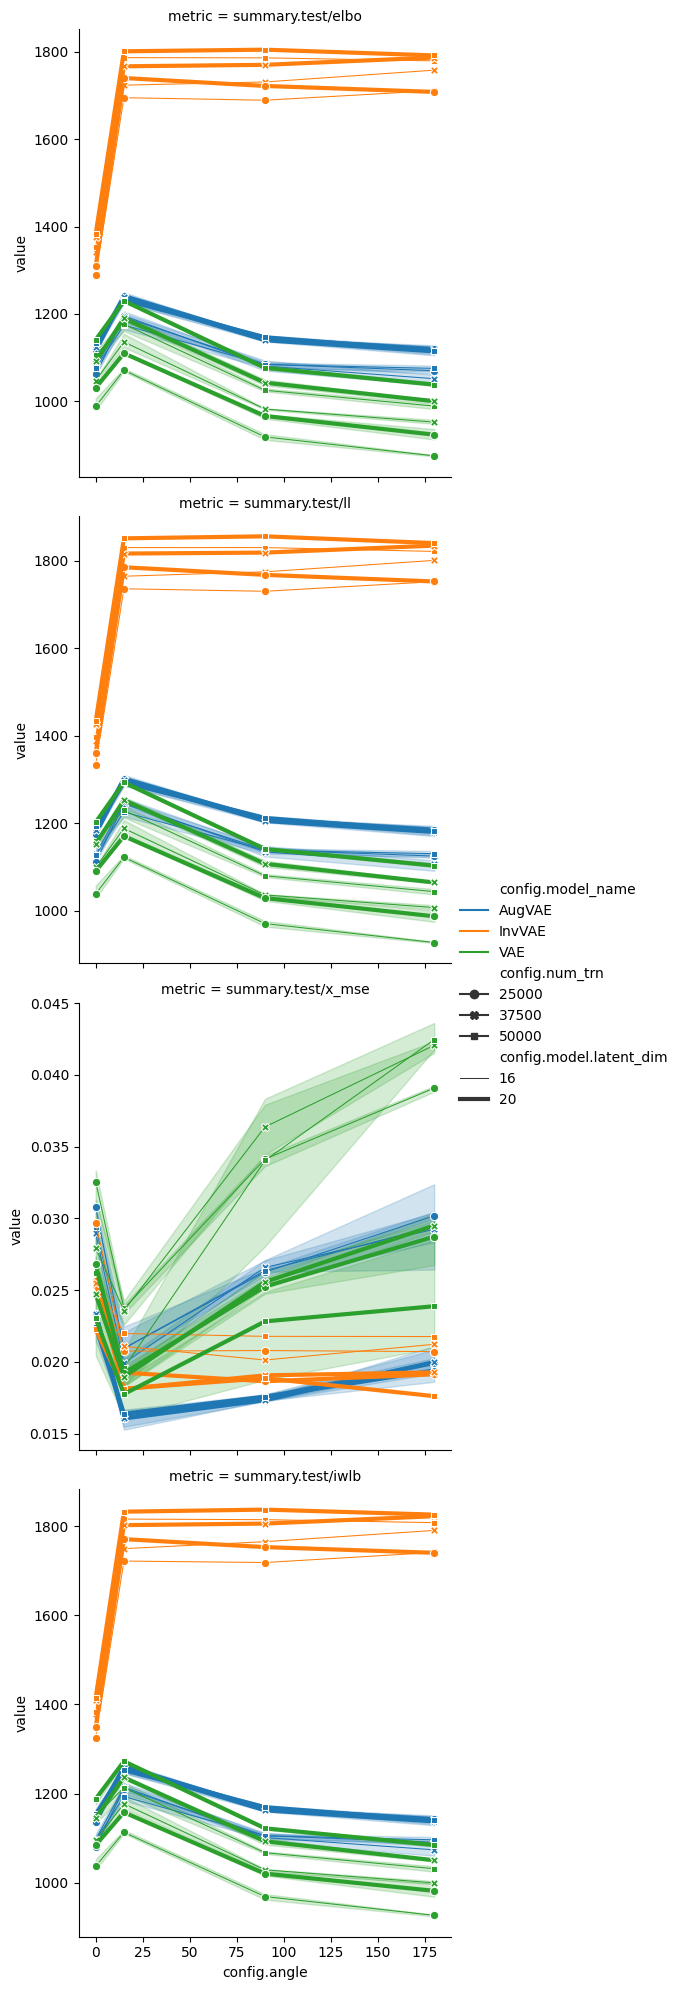

In [18]:
sns.relplot(
    data=plot_df,
    x="config.angle",
    y="value",
    row='metric',
    hue='config.model_name',
    style='config.num_trn',
    size='config.model.latent_dim',
    markers=True,
    dashes=False,
    kind='line',
    facet_kws={
        'sharey': False,
        'sharex': True,
    },
)

### Paper Plot

In [106]:
import matplotlib

text_width = 6.75  # in  --> Confirmed with template explanation
dpi = 300

fs_m1 = 6  # for figure ticks
fs = 8  # for regular figure text
fs_p1 = 9  #  figure titles

matplotlib.rc("font", size=fs)  # controls default text sizes
matplotlib.rc("axes", titlesize=fs)  # fontsize of the axes title
matplotlib.rc("axes", labelsize=fs)  # fontsize of the x and y labels
matplotlib.rc("xtick", labelsize=fs_m1)  # fontsize of the tick labels
matplotlib.rc("ytick", labelsize=fs_m1)  # fontsize of the tick labels
matplotlib.rc("legend", fontsize=7)  # legend fontsize
matplotlib.rc(
    "figure", titlesize=fs_p1, dpi=dpi, autolayout=True
)  # fontsize of the figure
matplotlib.rc("lines", linewidth=1, markersize=3)
matplotlib.rc("savefig", dpi=1200, bbox="tight")
matplotlib.rc("grid", alpha=0.3)
matplotlib.rc("axes", grid=True)

matplotlib.rc("font", **{"family": "serif", "serif": ["Palatino"]})
matplotlib.rc("text", usetex=True)

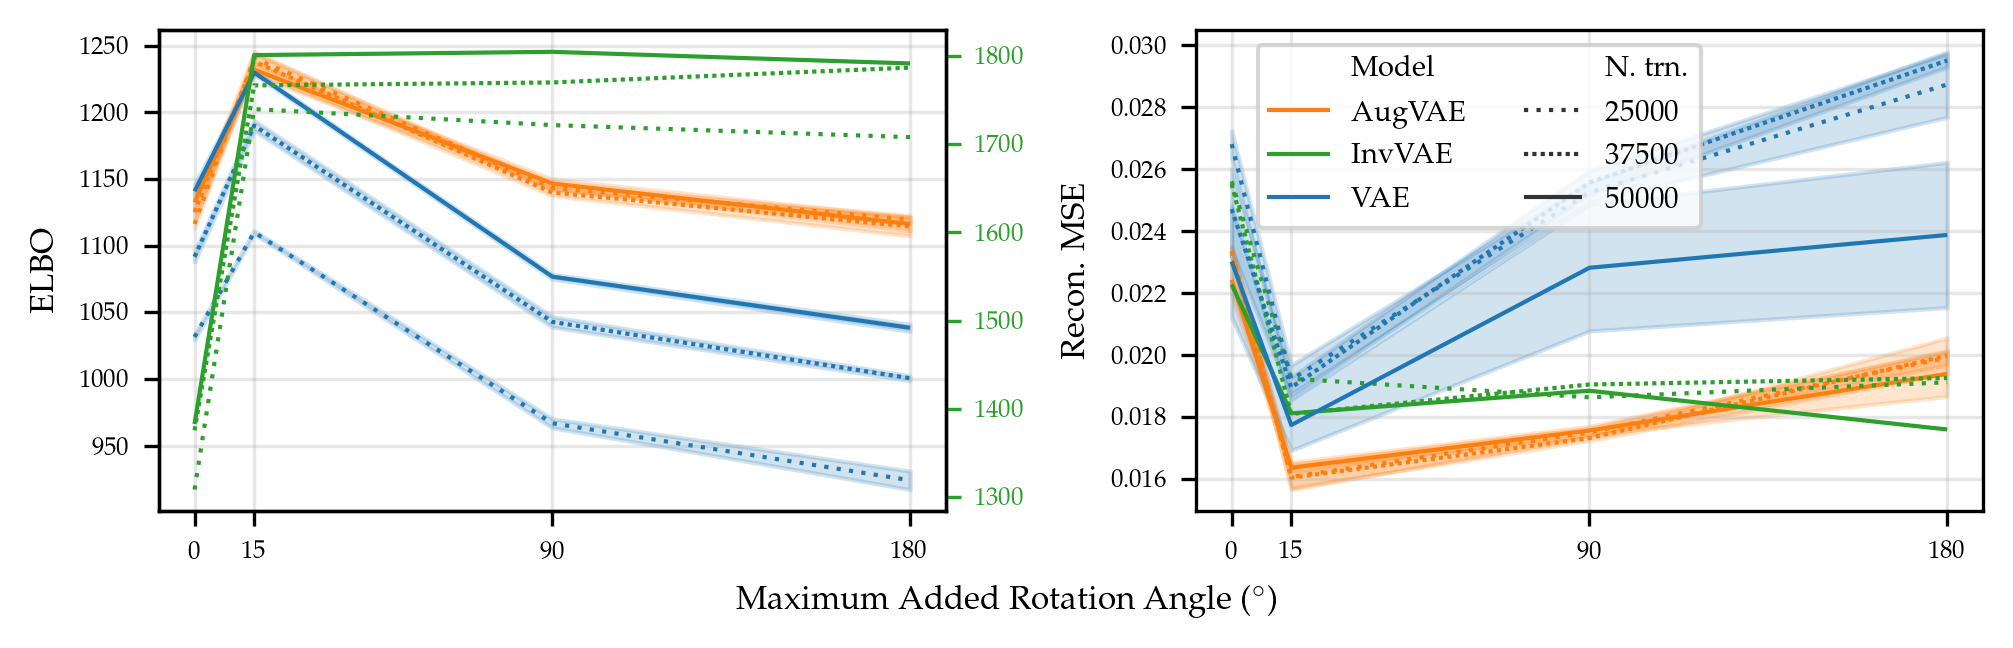

In [130]:
# make a matplotlib figure with two columns
fig, ax = plt.subplots(
    1,
    2,
    figsize=(text_width, text_width * 0.3),
    sharex=True,
    # sharey=True,
    # gridspec_kw={"wspace": 0.05, "hspace": 0.05},
)

tmp_df = df.reset_index()
# plot only config.model.latent_dim == 20
tmp_df = tmp_df[tmp_df['config.model.latent_dim'] == 20]
# rename the column config.model_name to Model and config.num_trn to N. trn.
tmp_df = tmp_df.rename(columns={'config.model_name': 'Model', 'config.num_trn': 'N. trn.'})


colors = {
    'VAE': 'tab:blue',
    'AugVAE': 'tab:orange',
    'InvVAE': 'tab:green',
}
markers = {
    25_000: 'X',
    37_500: 'X',
    50_000: 'X',
}
dashes = {
    25_000: (1, 2),
    37_500: (1, 1),
    50_000: (1, 0),
}

# first plot the test ELBO
ax0_twin = ax[0].twinx()
sns.lineplot(
    data=tmp_df[tmp_df['Model'] == 'InvVAE'],
    x="config.angle",
    y="summary.test/elbo",
    hue='Model',
    style='N. trn.',
    dashes=dashes,
    ax=ax0_twin,
    legend=False,
    palette=colors,
    # markers=markers,
    markersize=3,
    # alpha=0.66,
    errorbar='se',
)

sns.lineplot(
    data=tmp_df[tmp_df['Model'] != 'InvVAE'],
    x="config.angle",
    y="summary.test/elbo",
    hue='Model',
    style='N. trn.',
    dashes=dashes,
    ax=ax[0],
    legend=False,
    palette=colors,
    # markers=markers,
    markersize=3,
    # alpha=0.66,
    errorbar='se',
)

# then plot the test LL
# ax1_twin = ax[1].twinx()
# sns.lineplot(
#     data=tmp_df[tmp_df['Model'] == 'InvVAE'],
#     x="config.angle",
#     y="summary.test/x_mse",
#     hue='Model',
#     style='N. trn.',
#     dashes=False,
#     ax=ax1_twin,
#     legend=False,
#     palette=colors,
#     markers=markers,
#     markersize=3,
#     alpha=0.5,
# )

sns.lineplot(
    data=tmp_df,
    x="config.angle",
    y="summary.test/x_mse",
    hue='Model',
    style='N. trn.',
    dashes=dashes,
    ax=ax[1],
    legend=True,
    palette=colors,
    # markers=markers,
    markersize=3,
    errorbar='se',
)

# set the legend to have two columns
ax[1].legend(ncol=2, loc='upper center', 
             bbox_to_anchor=(.36, 1.)
             )

# only show x-ticks for the values in the data frame
ax[0].set_xticks(tmp_df['config.angle'].unique())

# remove the x-labels and replace with a shared x-label
ax[0].set_xlabel('')
ax0_twin.set_xlabel('')
ax[1].set_xlabel('')
# ax1_twin.set_xlabel('')
# add shared x sup label
fig.text(0.5, 0.0, 'Maximum Added Rotation Angle ($^\circ$)', ha='center', va='center')

ax[0].set_ylabel('ELBO')
ax0_twin.set_ylabel('')
ax[1].set_ylabel('Recon. MSE')
# ax1_twin.set_ylabel('MSE (InvVAE)')

ax0_twin.yaxis.label.set_color('tab:green')
ax0_twin.tick_params(axis="y", colors="tab:green")
ax0_twin.grid(False)

# ax1_twin.yaxis.label.set_color('tab:green')
# ax1_twin.tick_params(axis="y", colors="tab:green")
# ax1_twin.grid(False)

# add a shared title
# fig.suptitle('Rotated MNIST')


plt.tight_layout()

# save the figure
plt.savefig('rotated_mnist.pdf', bbox_inches='tight', dpi=300, pad_inches=0.01)

plt.show()

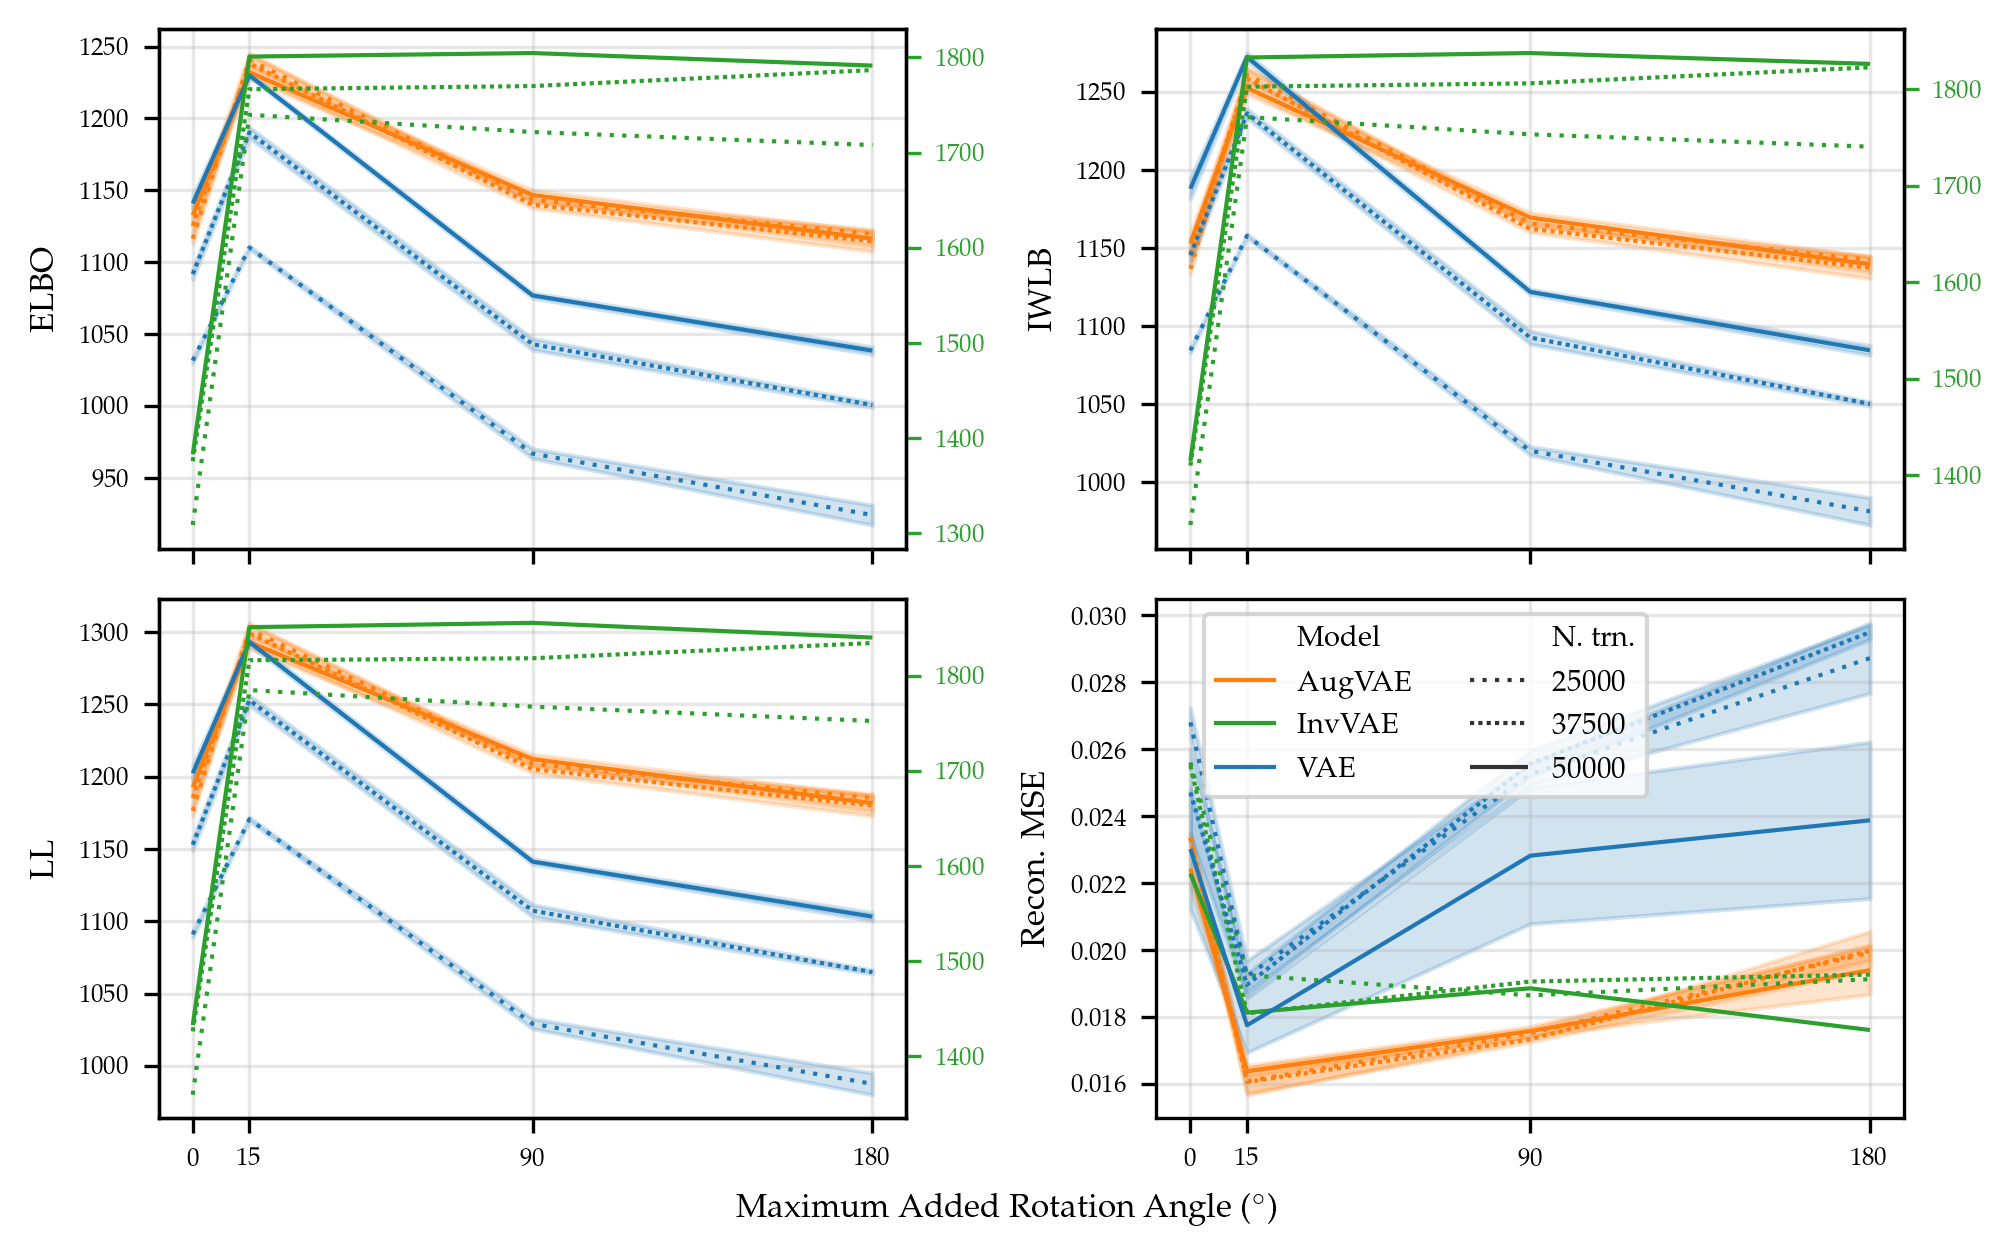

In [131]:
# make a matplotlib figure with two columns
fig, ax = plt.subplots(
    2,
    2,
    figsize=(text_width, text_width * 0.3 * 2),
    sharex=True,
    # sharey=True,
    # gridspec_kw={"wspace": 0.05, "hspace": 0.05},
)

tmp_df = df.reset_index()
# plot only config.model.latent_dim == 20
tmp_df = tmp_df[tmp_df['config.model.latent_dim'] == 20]
# rename the column config.model_name to Model and config.num_trn to N. trn.
tmp_df = tmp_df.rename(columns={'config.model_name': 'Model', 'config.num_trn': 'N. trn.'})


# first plot the test ELBO
ax00_twin = ax[0, 0].twinx()
sns.lineplot(
    data=tmp_df[tmp_df['Model'] == 'InvVAE'],
    x="config.angle",
    y="summary.test/elbo",
    hue='Model',
    style='N. trn.',
    dashes=dashes,
    ax=ax00_twin,
    legend=False,
    palette=colors,
    # markers=markers,
    markersize=3,
    # alpha=0.66,
    errorbar='se',
)

sns.lineplot(
    data=tmp_df[tmp_df['Model'] != 'InvVAE'],
    x="config.angle",
    y="summary.test/elbo",
    hue='Model',
    style='N. trn.',
    dashes=dashes,
    ax=ax[0, 0],
    legend=False,
    palette=colors,
    # markers=markers,
    markersize=3,
    # alpha=0.66,
    errorbar='se',
)

# then plot the test IWLB
ax01_twin = ax[0, 1].twinx()
sns.lineplot(
    data=tmp_df[tmp_df['Model'] == 'InvVAE'],
    x="config.angle",
    y="summary.test/iwlb",
    hue='Model',
    style='N. trn.',
    dashes=dashes,
    ax=ax01_twin,
    legend=False,
    palette=colors,
    # markers=markers,
    markersize=3,
    # alpha=0.66,
    errorbar='se',
)

sns.lineplot(
    data=tmp_df[tmp_df['Model'] != 'InvVAE'],
    x="config.angle",
    y="summary.test/iwlb",
    hue='Model',
    style='N. trn.',
    dashes=dashes,
    ax=ax[0, 1],
    legend=False,
    palette=colors,
    # markers=markers,
    markersize=3,
    # alpha=0.66,
    errorbar='se',
)

# then plot the test LL
ax10_twin = ax[1, 0].twinx()
sns.lineplot(
    data=tmp_df[tmp_df['Model'] == 'InvVAE'],
    x="config.angle",
    y="summary.test/ll",
    hue='Model',
    style='N. trn.',
    dashes=dashes,
    ax=ax10_twin,
    legend=False,
    palette=colors,
    # markers=markers,
    markersize=3,
    # alpha=0.66,
    errorbar='se',
)

sns.lineplot(
    data=tmp_df[tmp_df['Model'] != 'InvVAE'],
    x="config.angle",
    y="summary.test/ll",
    hue='Model',
    style='N. trn.',
    dashes=dashes,
    ax=ax[1, 0],
    legend=False,
    palette=colors,
    # markers=markers,
    markersize=3,
    # alpha=0.66,
    errorbar='se',
)

# then x mse
sns.lineplot(
    data=tmp_df,
    x="config.angle",
    y="summary.test/x_mse",
    hue='Model',
    style='N. trn.',
    dashes=dashes,
    ax=ax[1, 1],
    legend=True,
    palette=colors,
    # markers=markers,
    markersize=3,
    errorbar='se',
)

# set the legend to have two columns
ax[1, 1].legend(ncol=2, loc='upper center', 
             bbox_to_anchor=(.36, 1.)
             )

# only show x-ticks for the values in the data frame
ax[0, 0].set_xticks(tmp_df['config.angle'].unique())

# remove the x-labels and replace with a shared x-label
ax[0, 0].set_xlabel('')
ax00_twin.set_xlabel('')
ax[1, 1].set_xlabel('')
ax[0, 1].set_xlabel('')
ax[1, 0].set_xlabel('')
# ax1_twin.set_xlabel('')
# add shared x sup label
fig.text(0.5, 0.0, 'Maximum Added Rotation Angle ($^\circ$)', ha='center', va='center')

ax[0, 0].set_ylabel('ELBO')
ax00_twin.set_ylabel('')
ax[0, 1].set_ylabel('IWLB')
ax01_twin.set_ylabel('')
ax[1, 0].set_ylabel('LL')
ax10_twin.set_ylabel('')
ax[1, 1].set_ylabel('Recon. MSE')
# ax1_twin.set_ylabel('MSE (InvVAE)')

ax00_twin.yaxis.label.set_color('tab:green')
ax00_twin.tick_params(axis="y", colors="tab:green")
ax00_twin.grid(False)

ax01_twin.yaxis.label.set_color('tab:green')
ax01_twin.tick_params(axis="y", colors="tab:green")
ax01_twin.grid(False)

ax10_twin.yaxis.label.set_color('tab:green')
ax10_twin.tick_params(axis="y", colors="tab:green")
ax10_twin.grid(False)

# ax1_twin.yaxis.label.set_color('tab:green')
# ax1_twin.tick_params(axis="y", colors="tab:green")
# ax1_twin.grid(False)

# add a shared title
# fig.suptitle('Rotated MNIST')


plt.tight_layout()

# save the figure
plt.savefig('rotated_mnist_full.pdf', bbox_inches='tight', dpi=300, pad_inches=0.01)

plt.show()

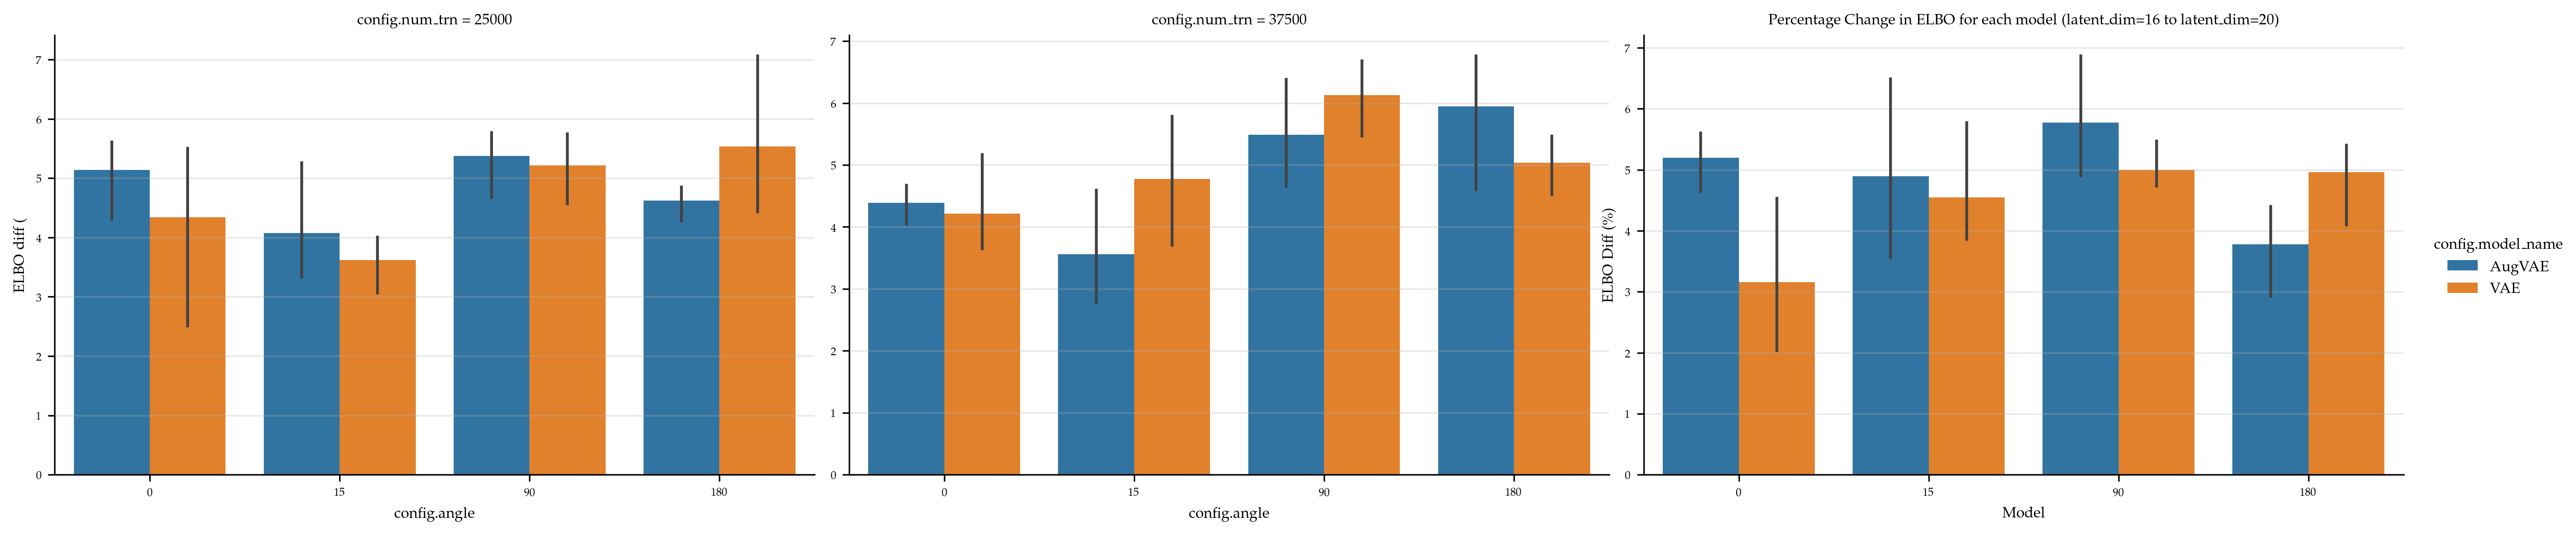

In [61]:
diff_df = df.reset_index()
diff_df = diff_df[diff_df['config.model_name'] != 'InvVAE']

# Calculate the percentage drop in ELBO for each model
diff_df['ELBO diff (%)'] = (diff_df.groupby(['config.model_name', 'config.num_trn', 'config.angle', 'config.seed'])['summary.test/elbo'].diff() / diff_df['summary.test/elbo'].shift()) * 100


diff_df = diff_df[diff_df['config.model.latent_dim'] == 20]

# Create the bar plot
sns.catplot(data=diff_df, x='config.angle', y='ELBO diff (%)', hue='config.model_name', col='config.num_trn', kind='bar', height=4, aspect=1.5, sharey=False, sharex=True)

# Set the plot title and labels
plt.title('Percentage Change in ELBO for each model (latent_dim=16 to latent_dim=20)')
plt.xlabel('Model')
plt.ylabel('ELBO Diff (\%)')

# Show the plot
plt.show()
